In [2]:
import pandas as pd
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data_sources/BankChurners.csv")

In [4]:
data.loc[(data['Attrition_Flag'] == 'Attrited Customer' ), ['Dependent_count'] ].value_counts()

Dependent_count
3                  482
2                  417
1                  269
4                  260
0                  135
5                   64
dtype: int64

In [5]:
data.loc[ (data['Gender'] == 'M') & (data['Attrition_Flag'] == 'Attrited Customer' ) ]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
54     714374133  Attrited Customer            56      M                2   
61     712030833  Attrited Customer            48      M                2   
99     711887583  Attrited Customer            47      M                2   
127    720201033  Attrited Customer            53      M                2   
144    767712558  Attrited Customer            59      M                1   
...          ...                ...           ...    ...              ...   
10112  708564858  Attrited Customer            33      M                2   
10113  713733633  Attrited Customer            27      M                0   
10118  713755458  Attrited Customer            50      M                1   
10123  710638233  Attrited Customer            41      M                2   
10125  717406983  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
54           Graduate        Married         $120K +          Blue   
61           Graduate        Married     $60K - $80K        Silver   
99            Unknown        Married    $80K - $120K          Blue   
127          Graduate        Married    $80K - $120K          Blue   
144           College         Single     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10112         College        Married         $120K +          Gold   
10113     High School       Divorced     $60K - $80K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
54                 36  ...       15769.0                    0   
61                 35  ...       34516.0                    0   
99                 37  ...        5449.0                 1628   
127                41  ...       11669.0                 2227   
144                53  ...       14979.0                    0   
...               ...  ...           ...                  ...   
10112              20  ...       34516.0                    0   
10113              36  ...       13303.0                 2517   
10118              36  ...        9959.0                  952   
10123              25  ...        4277.0                 2186   
10125              36  ...        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
54             15769.0                 1.041              602              15   
61             34516.0                 0.763              691              15   
99              3821.0                 0.696              836              18   
127             9442.0                 0.622              720              23   
144            14979.0                 0.710              530              10   
...                ...                   ...              ...             ...   
10112          34516.0                 1.004             9338              73   
10113          10786.0                 0.929            10219              85   
10118           9007.0                 0.825            10310              63   
10123           2091.0                 0.804             8764              69   
10125           5281.0                 0.535             8395              62   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
54                   0.364                  0.000   
61                   0.500                  0.000   
99                   0.385                  0.299   
127                  0.353                  0.191   
144                  1.000                  0.000   
...                    ...                    ...   
10112                0.622                  0.000   
10113                0.809                  0.189   
10118     

In [6]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# EXAMEN LIMPIEZA DE DATOS
*def: Un gerente comercial de una cartera de tarjetas de crédito de consumo se enfrenta al problema de la deserción de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán* \
1. Tratar variables nulas

In [7]:
data.select_dtypes('object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [8]:
data.select_dtypes('int64').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [9]:
data.select_dtypes('float64').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

- En caso de que la columna tenga mas del 90% de valores nulos excluir 

In [10]:
data.isnull().sum() ## Para ver resumen de las columnas con el conteo de valores nulos.

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [11]:
columns_valid = []
for column_ in data.columns:
    percentage = np.sum(pd.isna( data.loc[ : , column_ ] )) / data.shape[0]
    if percentage <= 0.9:
        columns_valid.append(column_)
    else:
        data = data.drop(columns=column_)

In [12]:
columns_valid ## Veremos la columnas validas (con menos del 90% de valores nulos)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

*Quitar columnas con un unico nivel (100% de representatividad), \
columnas con la totalidad de valores distintos (1% de representatividad) \
Columnas con más de un nivel y que al menos 1 nivel tengo más del 70% de representatividad*

In [13]:
columnsAnalisys = [] 
for c_ in data.columns:
    val = data.loc[ :, c_ ].drop_duplicates()
    if (val.shape[0] > 1) & (val.shape[0] < data.shape[0]):
        dfTmp = data.groupby(c_, as_index = False).agg({'CLIENTNUM': ['count']})
        dfTmp.columns = dfTmp.columns.droplevel(1)
        dfTmp['porcentage'] = dfTmp.apply(lambda r: ((r['CLIENTNUM'])/data.shape[0])*100, axis = 1)
        valR = dfTmp.loc[ dfTmp['porcentage'] >= 70, : ].shape[0]
        if valR == 0:
            columnsAnalisys.append(c_)

In [14]:
columnsAnalisys

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [15]:
columns_valid = ['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Nota: 
Se decidió retirar la columna "*Gender*" para evitar estratificar la data con un sesgo relacionado al genero de la persona, porque nos podría afectar directamente al resultado. Lo orientamos al analisis imparcial al genero, es decir, no buscamos obtener respuesta de si es una persona Masculina o femenina la que está en riesgo de deserción, simplemente si lo está o no.

Se retiraron las columnas "*Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1* y *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2*" porque representan variables de respuestas o etiquetas

In [16]:
columns_valid.append('Attrition_Flag')
columns_valid.append('Card_Category')

### Nota:
Se deciden agregar las siguientes columnas:
- "*Attrition_Flag:* " Se decide agregar para estratificar los registros por "*Personas activas e inactivas*", considerando está columna como la que contiene las categorias más grandes por las que podemos estratificar al no tener una columna de fechas para orientar a otro punto de vista el analisis. A pesar que un único nivel representa el 84% del total de la data
- "*Card_Category:* " Se decide agregar porque la categoria de la tarjeta está orientada a la decisión del cliente y tendríamos la segunda categoría más grande de estratificación.

In [17]:
columns_valid

['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Attrition_Flag',
 'Card_Category']

- Limpieza de valores númericas

In [18]:
## Attrition_Flag
## Tarjetas

In [19]:
data.loc[:, ['Attrition_Flag']].value_counts() / data.shape[0]

Attrition_Flag   
Existing Customer    0.83934
Attrited Customer    0.16066
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef02823610>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef02823c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef02823340>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef02845190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef02845460>],
 'means': []}

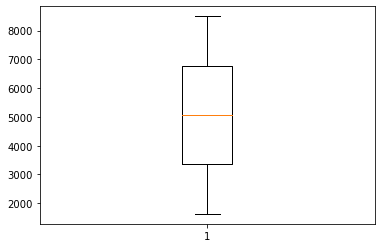

In [20]:
plt.boxplot(data.loc[:, ['Attrition_Flag']].value_counts())

Trabajamos ambos valores de "*Attrition_Flag*" porque el que representa el menor porcentaje, es un 16% y consideramos es demasiado información perdida.

In [21]:
data.loc[:, ['Card_Category']].value_counts()

Card_Category
Blue             9436
Silver            555
Gold              116
Platinum           20
dtype: int64

In [22]:
data.loc[:, ['Card_Category']].value_counts() / data.shape[0]

Card_Category
Blue             0.931767
Silver           0.054804
Gold             0.011455
Platinum         0.001975
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef02925100>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef029256a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef02914df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef02925c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef02925f10>],
 'means': []}

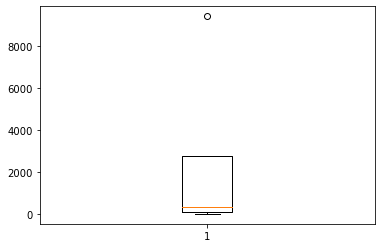

In [23]:
plt.boxplot(data.loc[:, ['Card_Category']].value_counts())

### Nota:
- Se decide excluir los valores *platinum* y *gold* de las categorias de tarjetas de credito, porque juntas representan menos del 2%

In [24]:
data = data.loc[ (data['Card_Category'] != 'Platinum') & (data['Card_Category'] != 'Gold'), : ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef02976fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef02985580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef02976cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef02985b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef02985df0>],
 'means': []}

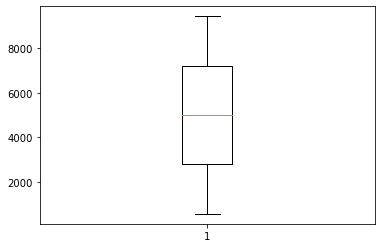

In [25]:
plt.boxplot(data.loc[:, ['Card_Category']].value_counts())

### ANALISIS PARA LA VARIABLE NUMERICA *CREDIT_LIMIT*

<AxesSubplot:xlabel='Card_Category', ylabel='Credit_Limit'>

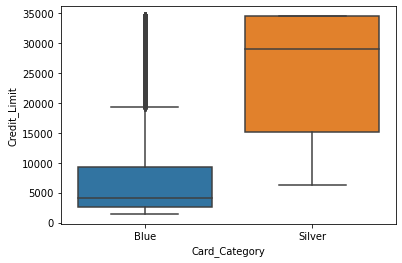

In [26]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer'), : ], x= 'Card_Category', y ='Credit_Limit' )

# Caso #1
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Blue
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

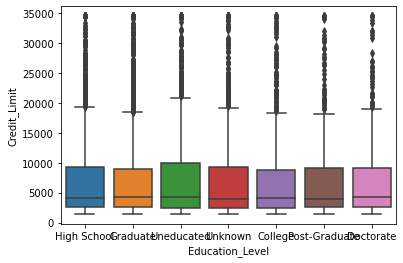

In [27]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

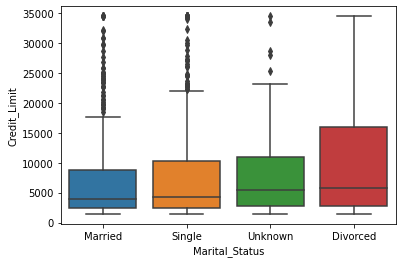

In [28]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

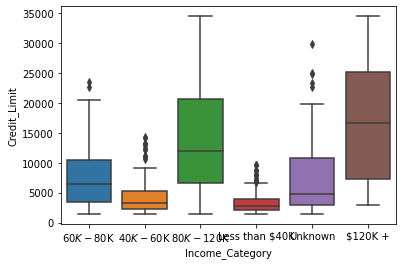

In [29]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

# Caso #2
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Silver
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

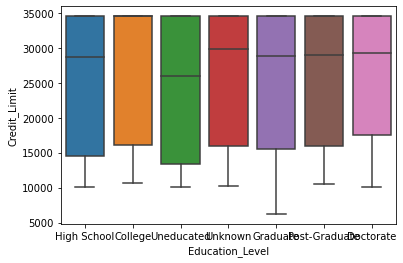

In [30]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

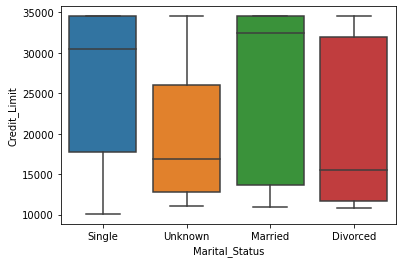

In [31]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

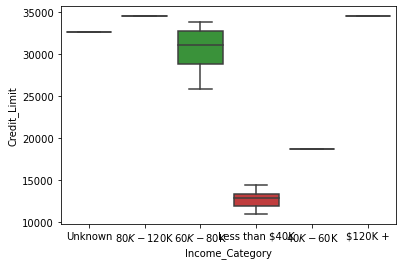

In [32]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

### ANALISIS DE CASO ESPECIFICO
*Def:* El caso seleccionado de los anteriormente vistos para la variable númerica "*Credit_Limit*", es el caso #1:
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Blue
- *Education_Level:* Uneducated
- *Marital_Status:* Married
- *Income_Category:* Unknown *Categoría seleccionada para hacer el zoom*

In [33]:
Unknow_Income = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Graduate') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Unknown'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef03cd0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef03cd1220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef03cd0970>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef03cd17c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef03cd1a90>],
 'means': []}

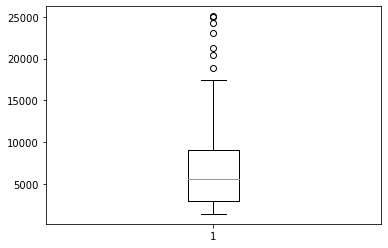

In [34]:
plt.boxplot(Unknow_Income)

In [35]:
q1 = np.quantile(Unknow_Income, .25)
q3 = np.quantile(Unknow_Income, .75)

In [36]:
iqr = q3 - q1

In [37]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [38]:
upper_bound

18270.875

### AUTOMATIZAR PARA CREDIT_LIMIT

In [39]:
dfq1 = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.25)
dfq1.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q1']

In [40]:
dfq3 = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.75)
dfq3.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q3']

In [41]:
dfmean = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).mean()
dfmean.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_MEAN']

In [42]:
df_iqr = dfq1.merge(dfq3, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how = 'inner').merge(dfmean, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how = 'inner')

In [43]:
df_iqr.head(3)

Attrition_Flag Card_Category Education_Level Marital_Status  \
0  Attrited Customer          Blue         College       Divorced   
1  Attrited Customer          Blue         College       Divorced   
2  Attrited Customer          Blue         College       Divorced   

  Income_Category  Credit_Limit_Q1  Credit_Limit_Q3  Credit_Limit_MEAN  
0         $120K +         34516.00          34516.0           34516.00  
1     $40K - $60K          3409.50           4076.5            3743.00  
2    $80K - $120K          6578.25          17977.0           14684.25

In [44]:
df_iqr['iqr'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] - r['Credit_Limit_Q1']), axis = 1)

In [45]:
df_iqr.head(3)

Attrition_Flag Card_Category Education_Level Marital_Status  \
0  Attrited Customer          Blue         College       Divorced   
1  Attrited Customer          Blue         College       Divorced   
2  Attrited Customer          Blue         College       Divorced   

  Income_Category  Credit_Limit_Q1  Credit_Limit_Q3  Credit_Limit_MEAN  \
0         $120K +         34516.00          34516.0           34516.00   
1     $40K - $60K          3409.50           4076.5            3743.00   
2    $80K - $120K          6578.25          17977.0           14684.25   

        iqr  
0      0.00  
1    667.00  
2  11398.75

In [46]:
df_iqr['upper_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] + (1.5*r['iqr'])), axis = 1)
df_iqr['lower_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q1'] - (1.5*r['iqr'])), axis = 1)

In [47]:
df_iqr.head(3)

Attrition_Flag Card_Category Education_Level Marital_Status  \
0  Attrited Customer          Blue         College       Divorced   
1  Attrited Customer          Blue         College       Divorced   
2  Attrited Customer          Blue         College       Divorced   

  Income_Category  Credit_Limit_Q1  Credit_Limit_Q3  Credit_Limit_MEAN  \
0         $120K +         34516.00          34516.0           34516.00   
1     $40K - $60K          3409.50           4076.5            3743.00   
2    $80K - $120K          6578.25          17977.0           14684.25   

        iqr  upper_bound  lower_bound  
0      0.00    34516.000    34516.000  
1    667.00     5077.000     2409.000  
2  11398.75    35075.125   -10519.875

In [48]:
df_f = data.merge(df_iqr, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how='left').copy()

In [49]:
df_f.shape

(9991, 29)

In [50]:
def newCredit_Limit(r):
    if (r['Credit_Limit'] < r['lower_bound']) | (r['Credit_Limit'] > r['upper_bound']):
        return r['Credit_Limit_MEAN']
    else:
        return r['Credit_Limit']

In [51]:
df_f['new_Credit_Limit'] = df_f.apply( lambda r: newCredit_Limit(r), axis = 1 )

### COMPARACIONES

- Credit_limit vs new_Credit_Limit

In [52]:
prueba1 = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Graduate') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Unknown'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef04013a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef040080a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef040137c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef04008640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef04008910>],
 'means': []}

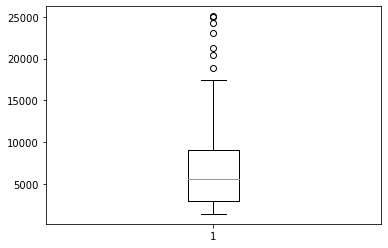

In [53]:
plt.boxplot(prueba1)

In [54]:
prueba2 = df_f.loc[ (df_f['Attrition_Flag'] == 'Existing Customer') & (df_f['Card_Category'] == 'Blue') & (df_f['Education_Level'] == 'Graduate') & (df_f['Marital_Status'] == 'Married') & (df_f['Income_Category'] == 'Unknown'), ['new_Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef0462e460>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef0462ea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef0462e190>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef0462efa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef047492b0>],
 'means': []}

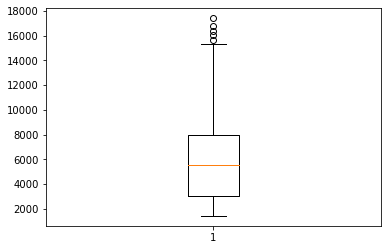

In [55]:
plt.boxplot(prueba2)

In [56]:
df_f['Customer_Age'].min()

26

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

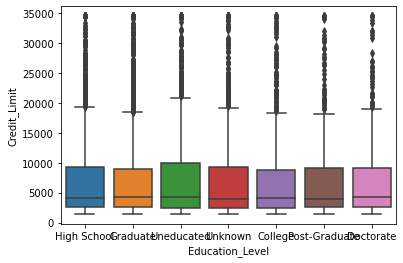

In [57]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Education_Level', ylabel='new_Credit_Limit'>

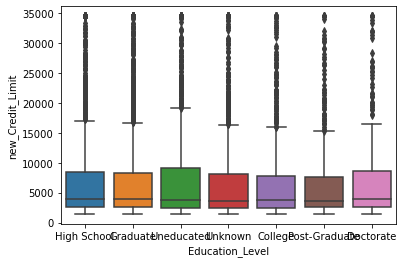

In [58]:
sns.boxplot(data = df_f.loc[ (df_f['Attrition_Flag'] == 'Existing Customer') & (df_f['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='new_Credit_Limit' )

In [59]:
df_f.head(2)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Avg_Utilization_Ratio  \
0              39  ...                  0.061   
1              44  ...                  0.105   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  \
0                                            0.99991                                                                                    
1                                            0.99994                                                                                    

   Credit_Limit_Q1  Credit_Limit_Q3  Credit_Limit_MEAN      iqr  upper_bound  \
0          3842.00          11476.0        8049.679200  7634.00    22927.000   
1          2120.25           4284.5        3469.597929  2164.25     7530.875   

   lower_bound  new_Credit_Limit  
0    -7609.000      12691.000000  
1    -1126.125       3469.597929  

[2 rows x 30 columns]